In [1]:
from ctpn.ctpn import CTPN_model
from setting import ckpt_path
print(ckpt_path)
from PIL import Image
import cv2
import time
from IPython.display import display
import numpy as np
from pytesseract import image_to_string
import os
from ocr.ocr import CrnnOcr
import ocr.model_net as mn
from torch.autograd import Variable

ctpn_model = CTPN_model(ckpt_path)

crnn = CrnnOcr('ocr/model/model_acc97.pth')

./ctpn/ckpt


Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)



Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead

### 先测试CTPN，返回boxes列表

In [26]:
img = cv2.imread('test/test.jpg',1)
start = time.time()
boxs = ctpn_model.predict(img)
print(time.time()-start)
# boxs

7.152491807937622


### 循环遍历每一个boxes

.1、图片
0.18407702445983887


2、类别D
0.2908804416656494


Actor
0.1359391212463379


‘材料类型
0.07015466690063477


|材料ID
0.061830997467041016


|营业执照
0.15125060081481934


‘zz01
0.08666253089904785


返回TrueORFalse
0.23085403442382812


|平面布置图zz02
0.2111496925354004


|食品许可证zz03
0.1407451629638672


|1、根据用户传入的D判断需/
0.16857528686523438


;身份证
0.10713338851928711


‘zz0
0.06939387321472168


要调用的模块
0.1148080825805664


)地图位置
0.10123276710510254


}zz06
0.0606694221496582


房屋所有权证zz07
0.16283464431762695


2、输入图片数据到指定模块
0.16115283966064453


‘cz001
0.07318234443664551


|寸照
0.07002997398376465


地图位置
0.07701516151428223


身份证
0.06848502159118652


房屋所有权证
0.09788370132446289


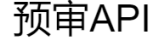

预预审API
0.10953569412231445


寸照
0.0631866455078125


|食品许可证
0.09282755851745605


营业执照
0.07483887672424316


平面布置图
0.09490060806274414


In [27]:
xDim, yDim = img.shape[1], img.shape[0]
for index, rec in enumerate(boxs):
    pt1 = [max(1, rec[0]), max(1, rec[1])]
    pt3 = [min(rec[6], xDim - 2), min(yDim - 2, rec[7])]
    partImg = img[pt1[1]:pt3[1], pt1[0]:pt3[0]]
    display(Image.fromarray(partImg))
    image = Image.fromarray(partImg).convert('L')
    scale = image.size[1] * 1.0 / 32
    w = image.size[0] / scale
    w = int(w)
    transformer = mn.resizeNormalize((w, 32))
    image = transformer(image).cpu()
    
    start = time.time()
    print(crnn.predict(image))
    print(time.time()-start)